In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
# # параметри виведення 
pd.set_option("display.max_columns", 500) # кількість колонок
pd.set_option("display.max_rows", 1000) # кількість рядків
pd.set_option("display.max_colwidth", 300) # ширина колонок
pd.set_option("display.precision", 7) # кількість знаків після коми

# # вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore") 

# # друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

df= pd.read_csv('applications.csv')
df2=pd.read_csv('industries.csv')

In [15]:
df3=pd.merge(df,df2, on='Industry', how='left')

unique_df = df3.drop_duplicates(subset='applicant_id', keep='first', inplace = False)

unique_df['External Rating'].fillna(value=0,inplace=True)

unique_df['Education level'].fillna(value='Середня',inplace=True)

In [16]:
unique_df = unique_df[~((unique_df['Amount'].isna()) | (unique_df['External Rating'] == 0))]

unique_df['Applied at'] = pd.to_datetime(unique_df['Applied at'], format='mixed')

day_week = unique_df['Applied at'].apply(lambda time: time.strftime('%A'))

unique_df['Week day'] = day_week

In [17]:
conditions = [
    (unique_df['Age'].between(35, 55)),
    (~unique_df['Week day'].str.startswith(('Saturday', 'Sunday'))),
    (unique_df['Marital status'] == 'Married'),
    (unique_df['Location'].isin(['Київ чи область'])),
    (unique_df['External Rating'] >= 7),
    (unique_df['External Rating'] <= 2)
]

points = [20, 20, 20, 10, 20, -20]

for condition,point in zip(conditions,points):
    unique_df['Score'] += condition*point

In [18]:
unique_df = unique_df[unique_df['Score'] != 0]
def get_first_day_of_week(date):
    year, week, day_of_week = date.isocalendar()
    first_day_of_week = date - datetime.timedelta(days=day_of_week - 1)
    return first_day_of_week

unique_df['First_day_week'] = unique_df['Applied at'].dt.date.apply(get_first_day_of_week)

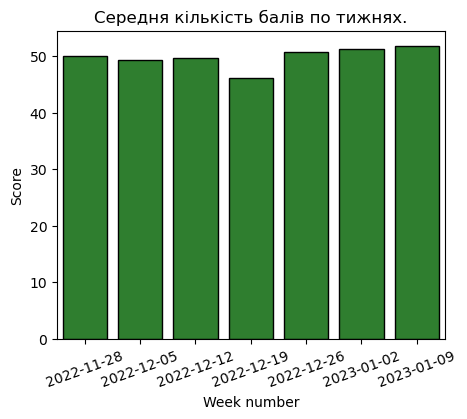

In [19]:
unique_df_grouped = unique_df.groupby(unique_df['First_day_week'])['Score'].mean().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(data=unique_df_grouped, x='First_day_week', y='Score',color='forestgreen',edgecolor='black')
plt.title('Середня кількість балів по тижнях.')
plt.xlabel('Week number')
plt.ylabel('Score')
plt.xticks(rotation=20)
plt.show()